# Amazon Stock Price Analysis with Python

## Overview

In this project, we perform an exploratory data analysis (EDA) on historical Amazon stock price data to uncover trends, seasonality, volatility, and return patterns.

By using Python libraries such as Pandas, Matplotlib, and Seaborn, we:

- Analyze yearly and monthly performance of the stock
- Investigate return distributions and volatility over time
- Visualize moving averages to understand price trends
- Extract insights useful for investors and analysts

## Dataset

The dataset contains historical stock data for **Amazon (AMZN)**, including:

- Date
- Open, High, Low, Close prices
- Adjusted Close
- Volume
- Calculated Daily Returns

Time Period Covered: `[May 1997 – July 2025]`  
Source: [Kaggle]

---

This project is part of a growing data analytics portfolio focused on real-world financial datasets. The goal is to demonstrate data storytelling, visualization skills, and business-relevant insights.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries and Loading Data

We start by analyzing the Amazon stock data to uncover insights into return patterns, trends, and volatility.
We begin by importing necessary libraries and preparing the dataset for analysis.


In [ ]:
import pandas as pd
import numpy as np


file_path = '/content/drive/My Drive/DataSets/Amazon_stock_data.csv'
df = pd.read_csv(file_path)
df.head()

# More Info for EDA:
df.shape
df.info()
df.dtypes  #dtypes
df.describe() #Summary stats

#Cleaning time!
# info() has determined that there is not any null values so no need for df.isnull().sum()
# print(df.duplicated().sum()): No duplicates were found as well!

print("Convert date column into an actual date type:")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Adding two columns, the month and the year columns: ")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df.head()
print("Changing the index to that of the date column:")
df.set_index('Date', inplace=True)
df.head()
print("Get Amazon's daily price return:")
df['Return'] = df['Close'].pct_change()
print("Daily price change:")
df["Price Change"] = df["High"] - df["Low"]
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093 entries, 0 to 7092
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7093 non-null   object 
 1   Close   7093 non-null   float64
 2   High    7093 non-null   float64
 3   Low     7093 non-null   float64
 4   Open    7093 non-null   float64
 5   Volume  7093 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 332.6+ KB
Convert date column into an actual date type:
Adding two columns, the month and the year columns: 
Changing the index to that of the date column:
Get Amazon's daily price return:
Daily price change:


,Close,High,Low,Open,Volume,Year,Month,Return,Price Change
Date,,,,,,,,,
2025-07-21,229.300003,229.690002,225.649994,225.839996,40297600,2025,July,0.014018,4.040009
2025-07-22,227.470001,230.000000,226.350006,229.679993,37483700,2025,July,-0.007981,3.649994
2025-07-23,228.289993,228.789993,227.089996,228.470001,28294900,2025,July,0.003605,1.699997
2025-07-24,232.229996,236.000000,228.639999,229.169998,42902300,2025,July,0.017259,7.360001
2025-07-25,231.440002,232.479996,231.179993,232.220001,28657600,2025,July,-0.003402,1.300003


## Annual Closing Price Trend

This chart displays Amazon's closing stock price at the end of each year. It helps visualize the long-term performance and growth trajectory of the stock over time.

### Insight:
A consistent upward trend in closing prices indicates strong historical growth, which may signal long-term investor confidence in Amazon.


Price yearly performance: 
Year
1997      0.156320
1998      0.783056
1999      3.453116
2000      2.326683
2001      0.610021
2002      0.824206
2003      1.887069
2004      2.178262
2005      1.994855
2006      1.795466
2007      3.361474
2008      3.494002
2009      4.364091
2010      6.957020
2011      9.833601
2012     11.015182
2013     14.901579
2014     16.627552
2015     23.906915
2016     34.976157
2017     48.408351
2018     82.086309
2019     89.459460
2020    134.042755
2021    167.193349
2022    126.098819
2023    121.372800
2024    184.628691
2025    209.569358
Name: Close, dtype: float64


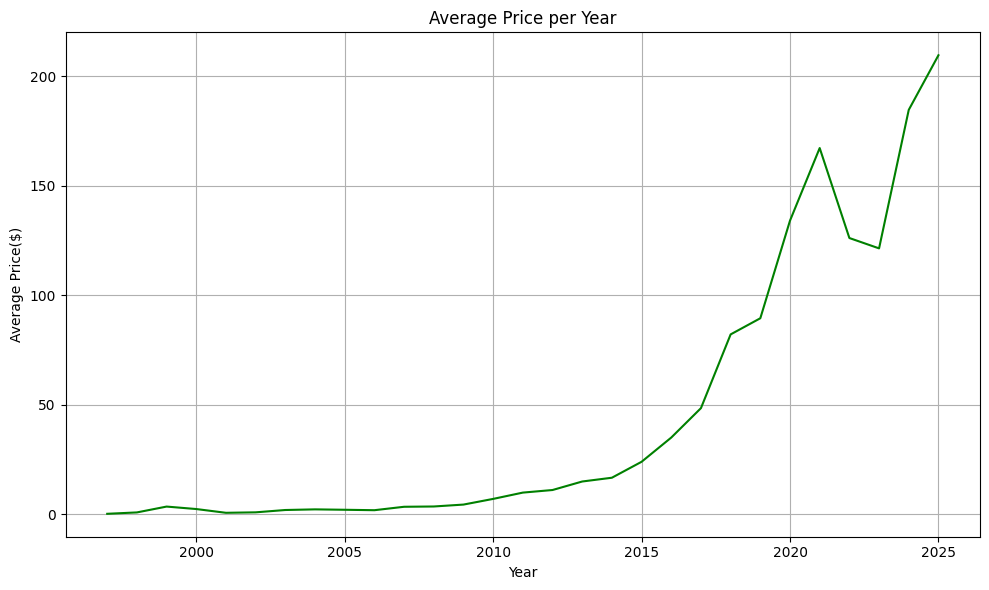

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze yearly average stock price to see if Amazon keeps gaining value as the years go by

print("Price yearly performance: ")
grouped_year = df.groupby('Year')['Close'].mean()
# print(grouped_year)
grouped_year.plot(kind='line', grid=True, color='green', figsize=(10,6))

plt.ylabel("Average Price($)")
plt.xlabel("Year")
plt.title("Average Price per Year")
plt.tight_layout()
plt.show()

## Annual Volatility

This chart displays yearly standard deviation of returns — another way to evaluate how risky Amazon’s stock was each year.

### Insight:
“Volatility spiked during earlier years, indicating that as years progress, the Amazon stock keeps getting steadier.”


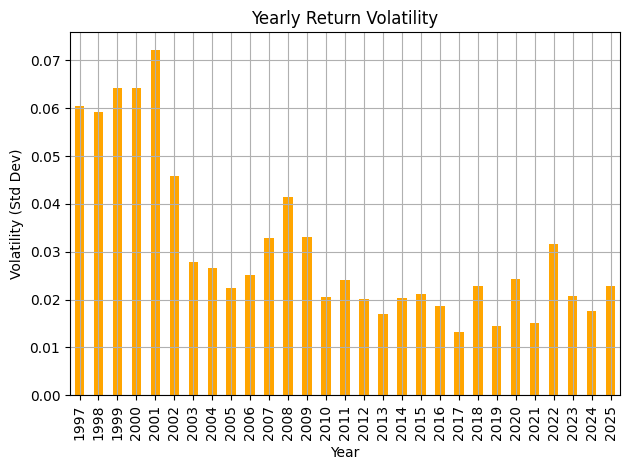

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze volaitility by Year--a key indicator in whether investors should choose to invest or not in this stock:

volatility = df.groupby('Year')['Return'].std()
# print(volatility)

volatility.plot(kind='bar', color='orange', title='Yearly Return Volatility',grid=True)
plt.xlabel('Year')
plt.ylabel('Volatility (Std Dev)')
plt.tight_layout()
plt.show()


## Monthly Volatility (Standard Deviation of Returns)

Volatility measures the risk or uncertainty in stock returns. Here, we use standard deviation of returns per month to evaluate which months are more or less volatile.

### Why this matters:
Investors typically prefer less volatile periods for safer investments. High volatility months may offer more opportunity — but with higher risk.

### Insight:
“January, July, and October exhibit higher volatility, suggesting caution and opportunity during those months.”


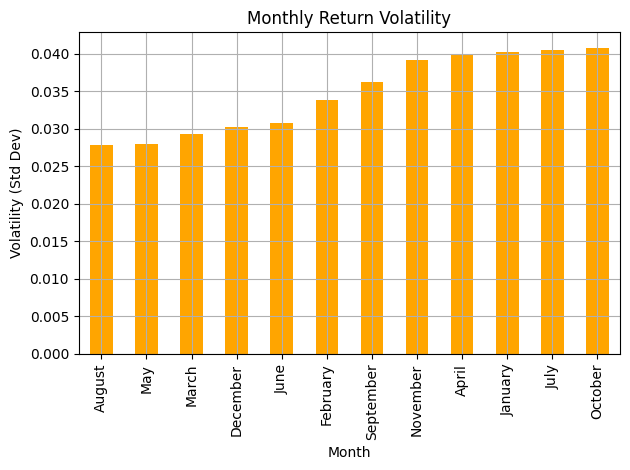

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze volatility by Month: Are there any particular months where the stock price tends to fluctuate?
volatility_month = df.groupby('Month')['Return'].std().sort_values()

volatility_month.plot(kind='bar', color='orange', title='Monthly Return Volatility',grid=True)
plt.xlabel('Month')
plt.ylabel('Volatility (Std Dev)')
plt.tight_layout()
plt.show()


## Average Monthly Returns

This horizontal bar chart shows the average percentage return of Amazon's stock for each calendar month, aggregated across all years in the dataset.

### Why this matters:
It helps identify which months tend to yield higher or lower returns. Some investors may use this to time entries or exits based on historical seasonality.

### Insight:
“April and November show the highest average returns, while February tends to underperform.”


Month
February    -0.116959
December     0.011621
May          0.047537
August       0.088096
October      0.157918
June         0.188961
July         0.210205
January      0.231198
March        0.241283
September    0.273334
November     0.335435
April        0.361094
Name: Return, dtype: float64


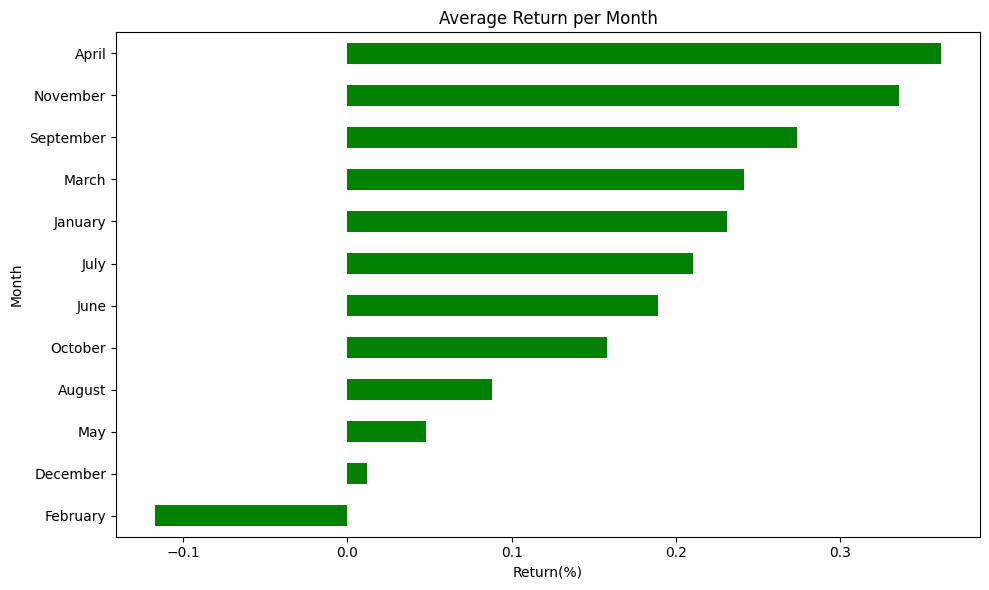

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze which months generally do better(have higher percentage returns)--where investors could potentially trade within
grouped_month = df.groupby('Month')['Return'].mean() * 100
grouped_month.sort_values(ascending=True, inplace=True)
print(grouped_month)

grouped_month.plot(kind='barh', figsize=(10,6), color='green')
plt.title("Average Return per Month")
plt.xlabel("Return(%)")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

## Trend Analysis Using Moving Averages

We use two moving averages — 50-day (short-term) and 200-day (long-term) — to identify overall trends in stock price movement.

### Why this matters:
When the short-term average crosses above the long-term average (a "golden cross"), it can signal bullish momentum. A cross below it (a "death cross") might indicate bearish momentum.

### Insight:
The plotted moving averages help smooth out daily fluctuations, showing the underlying trend in Amazon's stock performance over time.


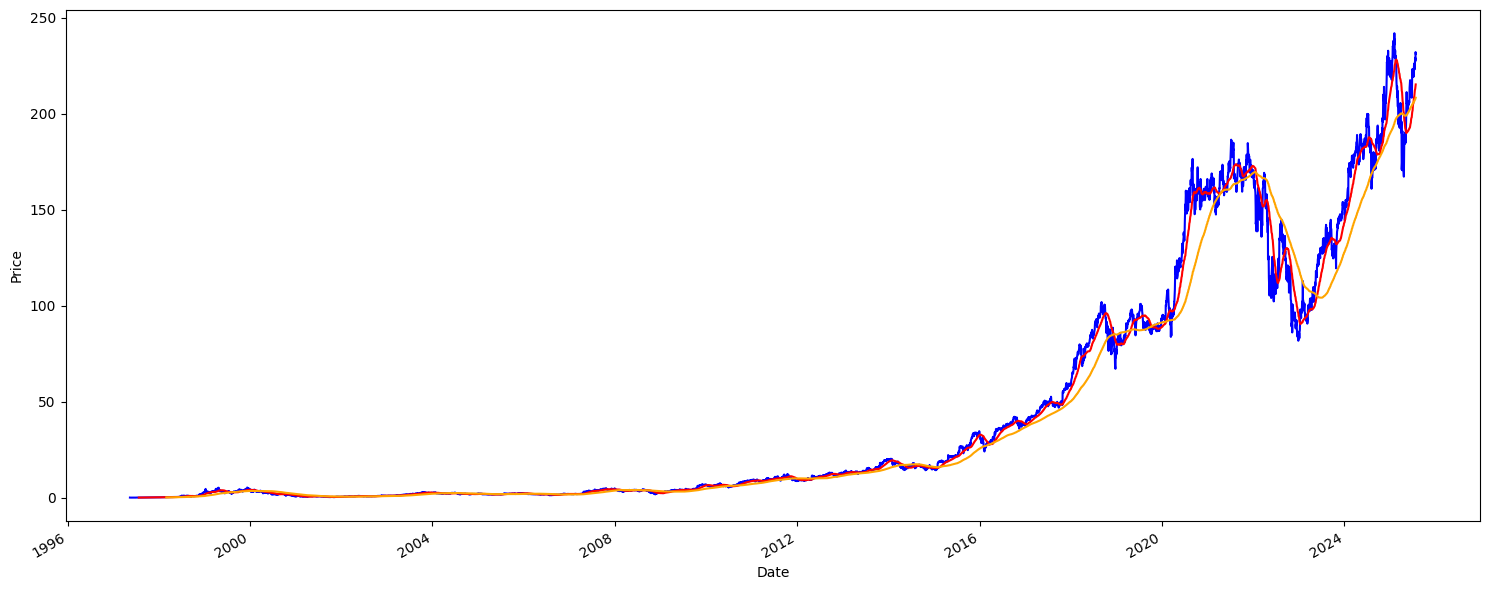

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot moving averages, short term and long term to identify trend:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df['Close'].plot(figsize=(15,6), color='blue', grid=True)
df['MA50'].plot(color='red')
df['MA200'].plot(color='orange')

plt.ylabel("Price")
plt.tight_layout()
plt.show()






## Distribution of Daily Returns

This histogram shows the distribution of daily returns over the entire dataset.

### Why this matters:
Understanding the shape of return distribution helps assess risk. A wide, flat distribution indicates high volatility, while a narrow one shows more stability.

### Insight:
“Most returns fall within a narrow band around 0%, but there are occasional large gains and losses, indicating some risk.”


/tmp/ipython-input-90-4188047763.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


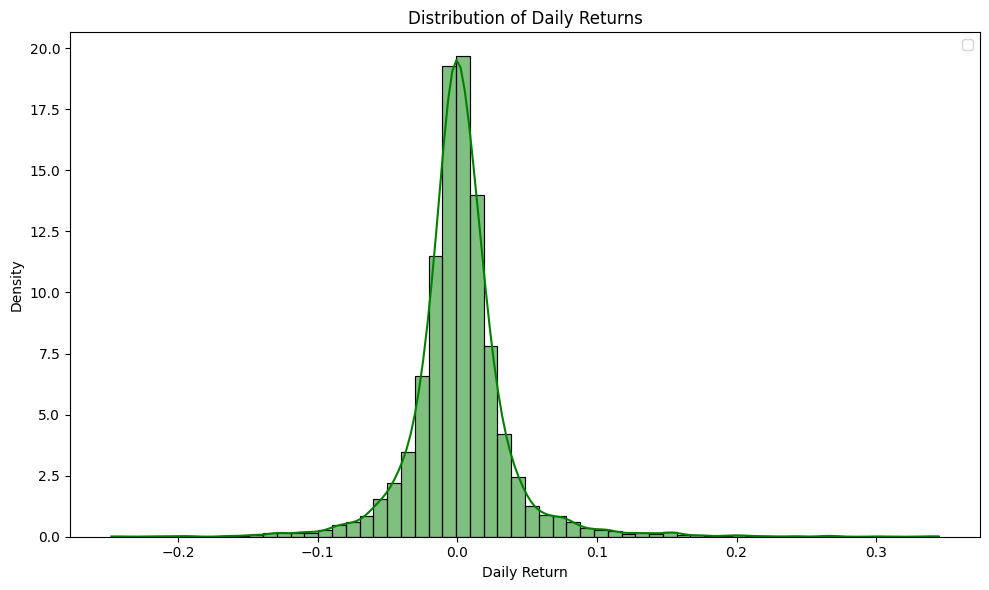

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10,6))
sns.histplot(df['Return'], bins=60, kde=True, color='green', stat='density')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


##Final Takeaways

- **Amazon stock** has shown consistent long-term growth in closing prices.
- Certain months (e.g., April/Nov) tend to perform better on average.
- Moving averages reveal overall bullish trends over the analyzed period.
- Volatility varies by month and year — with some periods being significantly riskier.
- Daily return distribution is relatively centered, with occasional large movements.

### Should investors consider Amazon?

Based on the data, Amazon shows historical strength and stability, with some seasonal patterns and moderate volatility. This could be attractive to both long-term investors and swing traders — depending on risk appetite.
